In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *
from scipy import *

In [2]:
N=4
tau = 4.*np.pi
granularity = 100
times = np.linspace(0., tau, granularity)  

In [4]:
# functions and operators for QuTip
def oplst(N): return [qeye(2) for n in range(N)]
def Sx(N, n) : op = oplst(N); op[n] = sigmax(); return tensor(op)
def Sy(N, n) : op = oplst(N); op[n] = sigmay(); return tensor(op)
def Sz(N, n) : op = oplst(N); op[n] = sigmaz(); return tensor(op)

#defenition of h(t) and J(t) for simulation

m = .5/tau

def get_h(t,args):
    h = 1-m*t
    return h
    
def get_j(t,args):
    j = m * t
    return j

#defenition of Ising Hamiltonian used for exact calculations
def Ising(h, J, N) :
    H  = -0.5*h*sum([Sz(N, n) for n in range(0, N)])
    H  -= 0.5*J*sum([Sx(N, n)*Sx(N, n+1) for n in range(0, N-1)])
    return H

#defenition of time dependent Hamiltonian for use in simulation

H1 = -0.5*sum([Sz(N, n) for n in range(0, N)])

H2 = -0.5*sum([Sx(N, n)*Sx(N, n+1) for n in range(0, N-1)])

H = [[H1,get_h],[H2,get_j]]

#Calculation of exact ground state and energy of starting Hamiltonian
H_i_exact = H1*get_h(1, None) + H2*get_j(0, None)
e0, psi0 = H_i_exact.groundstate()

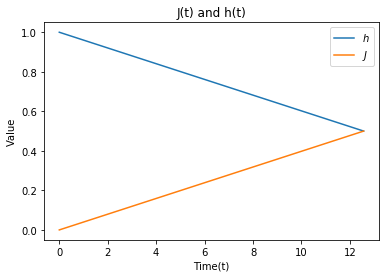

In [5]:
#Plotting time dependent components of Hamiltonian to show smooth movement of parameters from those that define an easily calulable ground state
#to the parameters of the desired ground state at time Tau
h_list = [get_h(t,m) for t in times]
j_list = [get_j(t,m) for t in times]
plt.plot(times,h_list,label='$h$')
plt.plot(times,j_list,label='$J$')
plt.xlabel("Time(t)")
plt.ylabel("Value")
plt.title("J(t) and h(t)")
plt.legend()
plt.show()

In [6]:
#Simulation is conducted here, mater equation is fed time dependent hamiltonian initial state(psi0) and times list
#Expectation vector of state of system for each timestep is retrived from solution object
sol = mesolve(H, psi0, times)
psis = sol.states

In [7]:
#Exact state of Hamiltonian at time Tau calculated for comparison with simulation results
H_f_exact = H1*get_h(tau, None) + H2*get_j(tau, None)
exact_energy, exact_psi = H_f_exact.groundstate()

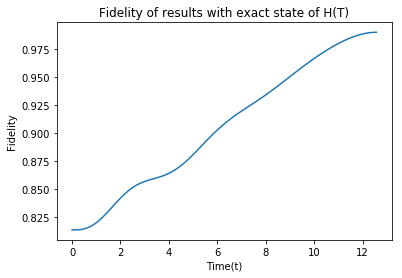

Final Fidelity: 0.9903091721995863


In [12]:
#Calculation of fidelity of experiment results for each time step t with the exact state of H(tau)
fidelity_f = [float((abs((psi_t.dag()*exact_psi).full())**2)[0]) for psi_t in psis ]

plt.plot(times,fidelity_f,label='H(T)')
plt.title("Fidelity of results with exact state of H(T)")
plt.xlabel("Time(t)")
plt.ylabel("Fidelity")
plt.show()

print("Final Fidelity: " + str(float((abs((psis[-1].dag()*exact_psi).full())**2)[0])))

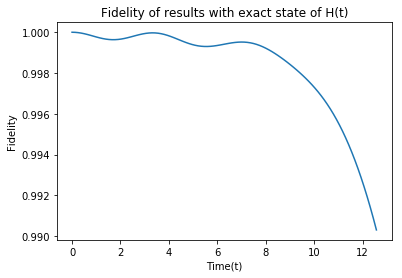

In [13]:
#Calculation of fidelity of experiment results for each time step t with the exact state of the same Hamiltonian at each time t

exact_psis_t = []

for t in times:
    H_t_exact = H1*get_h(t, None) + H2*get_j(t, None)
    _, exact_psi_t = H_t_exact.groundstate()
    exact_psis_t.append(exact_psi_t)

cont_fidelities=[]
for i in range(len(times)):
    cont_fidelities.append(float((abs((psis[i].dag()*exact_psis_t[i]).full())**2)[0]))

plt.title("Fidelity of results with exact state of H(t)")
plt.xlabel("Time(t)")
plt.ylabel("Fidelity")  
plt.plot(times,cont_fidelities)
plt.show()

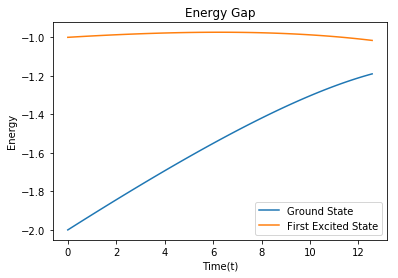

In [14]:
#Graphing of energy gap between first excited state and ground state of Hamiltonian
#only exact calculations are used here
H_t = []
exact_energys_t = []

grounds =[]
first_exciteds = []

for t in times:
    H_t_exact = H1*get_h(t, None) + H2*get_j(t, None)
    energys = H_t_exact.eigenenergies()
    grounds.append(energys[0])
    first_exciteds.append(energys[1])
    

plt.plot(times,grounds, label="Ground State")
plt.plot(times,first_exciteds, label="First Excited State")
plt.legend()
plt.title("Energy Gap")
plt.xlabel("Time(t)")
plt.ylabel("Energy") 
plt.show()